In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

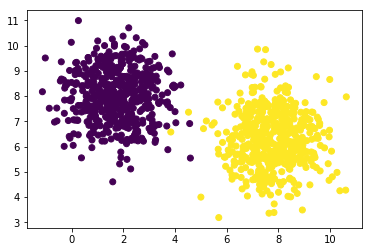

(1000, 3)


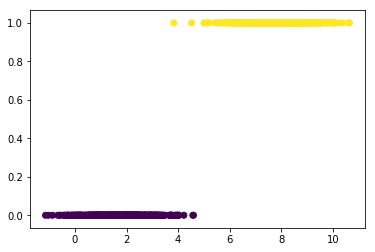

In [46]:
(X,y) =  make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1.05,random_state=20)
X_inp=np.c_[np.ones(X.shape[0]),X]

plt.scatter(X_inp[:,1],X_inp[:,2],marker='o',c=y)
plt.show()
print(X_inp.shape)

plt.scatter(X_inp[:,1],y,marker='o',c=y)
plt.show()

In [47]:
W=np.random.uniform(size=X_inp.shape[1])
print(W)

[0.50070574 0.60352281 0.00120463]


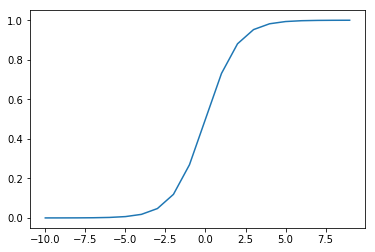

In [48]:
def sigmoid(x):
    return float(1/(1+float(np.exp(-x))))
sx=range(-10,10)
sy=[]
for i in sx:
    sy.append(sigmoid(i))
plt.plot(sx,sy)
plt.show()

In [49]:
def predict():
    predicted_y=[]
    for x in X_inp:
        logit=x.dot(W)
        sig=sigmoid(logit)
        predicted_y.append(sig)
    return np.array(predicted_y)
d=predict()
d

array([0.89467806, 0.9981163 , 0.66312704, 0.99045486, 0.98616302,
       0.99466975, 0.99618446, 0.99133103, 0.98613009, 0.74837413,
       0.58418697, 0.98723249, 0.84712046, 0.83038525, 0.99249628,
       0.9886691 , 0.8504048 , 0.85759682, 0.91206185, 0.82890159,
       0.99346061, 0.79632844, 0.81994552, 0.99092263, 0.99856743,
       0.89173533, 0.99276031, 0.99754848, 0.78181028, 0.9925041 ,
       0.99766243, 0.99837573, 0.99818035, 0.99699112, 0.85603544,
       0.83850328, 0.98078561, 0.79287969, 0.99123281, 0.99587414,
       0.99025601, 0.91804853, 0.98261919, 0.60874318, 0.99533674,
       0.99049375, 0.99459933, 0.99615443, 0.85152048, 0.9959128 ,
       0.99226107, 0.99667083, 0.99048595, 0.99327407, 0.89165128,
       0.7698531 , 0.98862755, 0.99322505, 0.98885096, 0.62329801,
       0.8576933 , 0.87181213, 0.9985069 , 0.99460657, 0.75058257,
       0.8189953 , 0.99793319, 0.98894081, 0.89083417, 0.74943564,
       0.93233313, 0.84711273, 0.74963524, 0.79989896, 0.99635

In [50]:
def cost_function(predicted_y):
    error=-(y*np.log(predicted_y)+(1-y)*np.log((1-predicted_y)))
    cf=sum(error)/X_inp.shape[0]
    return cf,error

In [55]:
def GD(epochs,LR):
    total_expected_error=float("inf")
    errorlist=[]
    finalepoch=0
    
    for epoch in range(epochs):
        global W
        predicted_y=predict()
        total_error,error=cost_function(predicted_y)
        
        gradient=X_inp.T.dot(error)/X_inp.shape[0]
        
        if epoch==0:
            print(X_inp.shape,error.shape,X_inp.T.shape,gradient.shape,W.shape)
        
        if epoch%10==0:
            errorlist.append(total_error)
            finalepoch+=1
          
        if (total_expected_error<total_error):
            return errorlist,finalepoch
            
        total_expected_error=total_error
        
        for (i,w) in enumerate(gradient):
            W[i]+=float(-LR)*w
            
    return errorlist,finalepoch

(1000, 3) (1000,) (3, 1000) (3,) (3,)


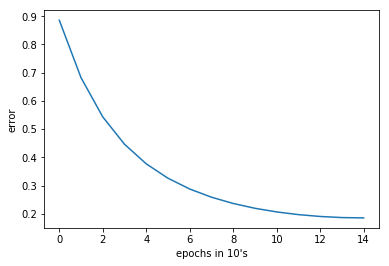

In [56]:
total_error,finalepoch=GD(1000,0.001)
plt.plot(range(finalepoch),total_error)
plt.xlabel("epochs in 10's")
plt.ylabel("error")
plt.show()

In [65]:
yhat= predict() # we get the probablities scores (between 0 and 1)

#if the score is above 0.5 lets make it 1 else make it 0
for i,v in enumerate(yhat):
    if v >=0.57: 
        yhat[i]=1
    else:
        yhat[i]=0

yhat.astype(int)

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [66]:
y

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [67]:
error=sum((yhat-y)**2)
print(error)
accuracy=1-(error/100)
accuracy

4.0


0.96